## Task 01

In [65]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [66]:
# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [67]:
# Shape, info and describe
print(df.shape)
print("\n")
print(df.info())
print("\n")
print(df.describe())

(25, 2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


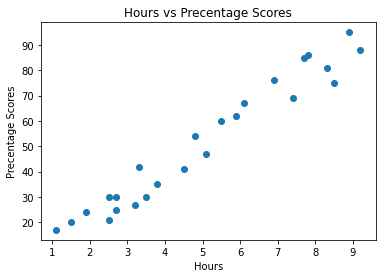

In [68]:
# vusualize the data
plt.scatter(df['Hours'], df['Scores'])
plt.title("Hours vs Precentage Scores")
plt.xlabel("Hours")
plt.ylabel("Precentage Scores")
plt.show()

In [69]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Here the data are strongly correlated.

In [70]:
# created feature and target
# X = df.iloc[:, :-1].values
# y = df.iloc[:, 1].values
y = df['Scores'].values.reshape(-1, 1)
X = df['Hours'].values.reshape(-1, 1)

In [71]:
# import sklearn library and split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [72]:
# training data with linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [73]:
# predict and accuaracy
y_pred = lr.predict(X_test)

## Model Evaluation

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_squared_error(y_test, y_pred, squared=False))

5.155850704673393


The lower value of the  RMSE is better to predict value.

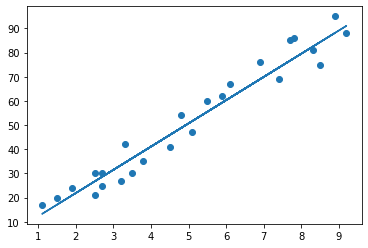

In [75]:
# Plot the regression line
line = lr.coef_*X + lr.intercept_

plt.scatter(X, y)
plt.plot(X, line)
plt.show()

In [88]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

   Actual  Predicted
0      20  17.097967
1      54  48.783639
2      35  39.181920
3      67  61.265873
4      95  88.150686


In [86]:
# What willbe the predicted score if a student studies for 9.25 hrs/day?
score = lr.predict([[9.25]])
score

array([[91.51128762]])

That means if a student studies 9.25 hours per day he/she will get 92% marks.